In [1]:
%matplotlib inline


# Recursive feature elimination

A recursive feature elimination example showing the relevance of pixels in
a digit classification task.

<div class="alert alert-info"><h4>Note</h4><p>See also `sphx_glr_auto_examples_feature_selection_plot_rfe_with_cross_validation.py`</p></div>


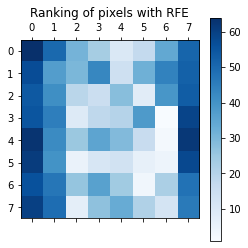

In [2]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Load the digits dataset
digits = load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X, y)
ranking = rfe.ranking_.reshape(digits.images[0].shape)

# Plot pixel ranking
plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()

In [12]:
from numpy import mean
from numpy import std
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
df = pd.read_csv("./data/maps-synthetic-data-v1.1.csv")
knndf = pd.read_csv("KNN_Imputation_data(rounded).csv")
# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# create pipeline
sett = ['talk_phon_week', 'talk_phon_wend', 'text_wend', 'comp_wend', 'talk_mob_week', 'tv_wend', 'text_week', 'talk_mob_wend', 'comp_week', 'tv_week', 'fam_tv_eve', 'fam_tv_aft', 'fam_tv_mor', 'phone_14_wend', 'phone_14_week']
X = knndf[sett].to_numpy()
y = knndf['has_dep_diag'].to_numpy()
rfe = RFECV(estimator=DecisionTreeClassifier())
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
rfe.fit(X, y)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print(rfe.ranking_)
print(rfe.n_features_)

Accuracy: 0.967 (0.000)
[14 15 11  7 10  1  4  3  8  5  9  6  2 12 13]
1


['talk_phon_week', 'talk_phon_wend', 'text_wend', 'comp_wend', 'talk_mob_week', 'tv_wend', 'text_week', 'talk_mob_wend', 'comp_week', 'tv_week', 'fam_tv_eve', 'fam_tv_aft', 'fam_tv_mor', 'phone_14_wend', 'phone_14_week']
[False False False False  True False False False False False False False
  True  True False]
talk_mob_week
fam_tv_mor
phone_14_wend
[ 3  2 12  7  1  8  6  9  4 10  5 11  1  1 13]
Optimal number of features : 3


C:\Users\oq19291\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


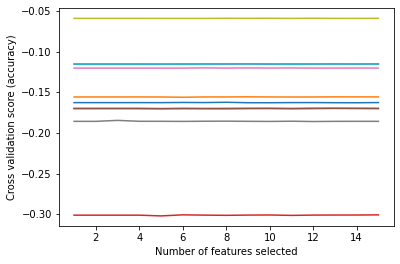

In [15]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
sett = ['talk_phon_week', 'talk_phon_wend', 'text_wend', 'comp_wend', 'talk_mob_week', 'tv_wend', 'text_week', 'talk_mob_wend', 'comp_week', 'tv_week', 'fam_tv_eve', 'fam_tv_aft', 'fam_tv_mor', 'phone_14_wend', 'phone_14_week']
print(sett)
X = knndf[sett].to_numpy()
y = knndf['has_dep_diag'].to_numpy()
estimator = SVR(kernel="linear")
min_features_to_select = 1  # Minimum number of features to consider
selector = RFECV(estimator, step=1, cv=10,min_features_to_select=min_features_to_select)
selector = selector.fit(X, y)
print(selector.support_)
for i in range(len(selector.support_)):
    if (selector.support_[i]==True):
        print(sett[i])
print(selector.ranking_)

print("Optimal number of features : %d" % selector.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(range(min_features_to_select, len(selector.grid_scores_) + min_features_to_select),selector.grid_scores_)
plt.show()

C:\Users\oq19291\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


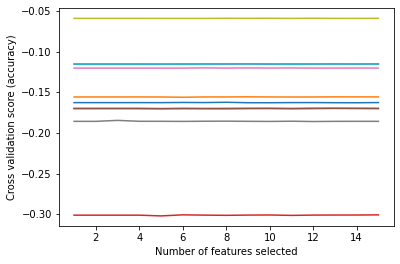

[[-0.1626834  -0.15570318 -0.17003568 -0.30125779 -0.11521224 -0.16981048
  -0.12018142 -0.18573194 -0.05893313 -0.11521224]
 [-0.1626834  -0.15570318 -0.17003568 -0.30125779 -0.11521174 -0.16981019
  -0.12018142 -0.18573194 -0.05893313 -0.11521224]
 [-0.16269227 -0.15570332 -0.170032   -0.30125961 -0.11521245 -0.16980522
  -0.1201812  -0.1845463  -0.05893259 -0.11520783]
 [-0.16266791 -0.15568882 -0.17003601 -0.3012563  -0.1152258  -0.1698127
  -0.12018145 -0.18565493 -0.05893653 -0.11521202]
 [-0.16270415 -0.15571364 -0.17012134 -0.3021814  -0.115281   -0.17007844
  -0.12018288 -0.18567343 -0.05895903 -0.11520584]
 [-0.16248529 -0.15604198 -0.17000485 -0.30086067 -0.11520041 -0.16982108
  -0.12020243 -0.18578946 -0.05897581 -0.1152215 ]
 [-0.1626047  -0.15568875 -0.17009907 -0.3012031  -0.11511061 -0.16992876
  -0.11991075 -0.18558883 -0.05900024 -0.11518421]
 [-0.16226226 -0.15568549 -0.17026914 -0.30146887 -0.11523122 -0.16975058
  -0.12012876 -0.18548387 -0.05880608 -0.11500377]
 

C:\Users\oq19291\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


In [19]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(range(1, 16),selector.grid_scores_)
plt.show()
print(selector.grid_scores_)

In [41]:
!pip install imblearn
!pip install scipy
!pip install scikit-learn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.ensemble import RandomForestClassifier



Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


['talk_phon_week', 'talk_phon_wend', 'text_wend', 'comp_wend', 'talk_mob_week', 'tv_wend', 'text_week', 'talk_mob_wend', 'comp_week', 'tv_week', 'fam_tv_eve', 'fam_tv_aft', 'fam_tv_mor', 'phone_14_wend', 'phone_14_week']
Counter({0.0: 13284, 1.0: 450})
{0.0: 3433, 1.0: 3433}
(6866, 15)
(6866,)
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Optimal number of features : 15


C:\Users\oq19291\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


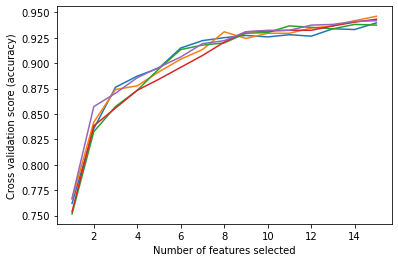

text_wend
comp_wend
tv_wend
text_week
comp_week
fam_tv_mor
phone_14_wend
phone_14_week


In [50]:
scaler = StandardScaler()
sett = ['talk_phon_week', 'talk_phon_wend', 'text_wend', 'comp_wend', 'talk_mob_week', 'tv_wend', 'text_week', 'talk_mob_wend', 'comp_week', 'tv_week', 'fam_tv_eve', 'fam_tv_aft', 'fam_tv_mor', 'phone_14_wend', 'phone_14_week']
print(sett)
X = knndf[sett].to_numpy()
y = knndf['has_dep_diag'].to_numpy()
X= scaler.fit_transform(X)
smote_strat={}
under_strat={}
for category in Counter(y).keys():
    if Counter(y)[category] > round(len(y)/(len(Counter(y))*2)):
        smote_strat[category] = Counter(y)[category]
        under_strat[category] = (round(len(y)/(len(Counter(y))*2)))-1
    else:
        smote_strat[category] = (round(len(y)/(len(Counter(y))*2)))-1
        under_strat[category] = (round(len(y)/(len(Counter(y))*2)))-1
print(Counter(y))
print(under_strat)
smote = SMOTE(sampling_strategy=smote_strat,k_neighbors = 1)
under = RandomUnderSampler(sampling_strategy=under_strat)
steps = [('o', smote), ('u', under)]
pipeline = Pipeline(steps=steps)
# fit predictor and target variable
X, y = pipeline.fit_resample(X, y)

estimator = RandomForestClassifier()
#estimator = SVR(kernel="linear")
min_features_to_select = 1  # Minimum number of features to consider
selector = RFECV(estimator, step=1, cv=5,min_features_to_select=min_features_to_select)
print(X.shape)
print(y.shape)
selector = selector.fit(X, y)
print(selector.support_)
print(selector.ranking_)

print("Optimal number of features : %d" % selector.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(range(min_features_to_select, len(selector.grid_scores_) + min_features_to_select),selector.grid_scores_)
plt.show()
selector = RFE(estimator, n_features_to_select=8, step=1)
selector = selector.fit(X, y)
for i in range(len(selector.support_)):
    if (selector.support_[i]==True):
        print(sett[i])

['talk_phon_week', 'talk_phon_wend', 'text_wend', 'comp_wend', 'talk_mob_week', 'tv_wend', 'text_week', 'talk_mob_wend', 'comp_week', 'tv_week', 'fam_tv_eve', 'fam_tv_aft', 'fam_tv_mor', 'phone_14_wend', 'phone_14_week']
Counter({0.0: 13396, 1.0: 277, 2.0: 37, 3.0: 14, 4.0: 10})
{0.0: 1372, 2.0: 1372, 1.0: 1372, 3.0: 1372, 4.0: 1372}
(6860, 15)
(6860,)
[ True  True  True  True  True  True  True  True  True  True False  True
  True  True  True]
Optimal number of features : 14


C:\Users\oq19291\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


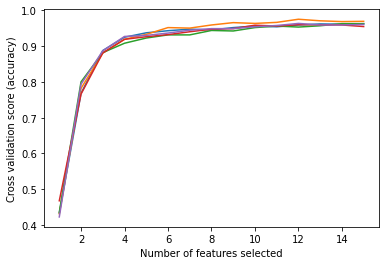

talk_phon_wend
comp_wend
talk_mob_week
tv_wend
text_week
tv_week
phone_14_wend
phone_14_week


In [51]:
scaler = StandardScaler()
sett = ['talk_phon_week', 'talk_phon_wend', 'text_wend', 'comp_wend', 'talk_mob_week', 'tv_wend', 'text_week', 'talk_mob_wend', 'comp_week', 'tv_week', 'fam_tv_eve', 'fam_tv_aft', 'fam_tv_mor', 'phone_14_wend', 'phone_14_week']
print(sett)
X = knndf[sett].to_numpy()
y = knndf['panic_score'].to_numpy()
X= scaler.fit_transform(X)
smote_strat={}
under_strat={}
for category in Counter(y).keys():
    if Counter(y)[category] > round(len(y)/(len(Counter(y))*2)):
        smote_strat[category] = Counter(y)[category]
        under_strat[category] = (round(len(y)/(len(Counter(y))*2)))-1
    else:
        smote_strat[category] = (round(len(y)/(len(Counter(y))*2)))-1
        under_strat[category] = (round(len(y)/(len(Counter(y))*2)))-1
print(Counter(y))
print(under_strat)
smote = SMOTE(sampling_strategy=smote_strat,k_neighbors = 1)
under = RandomUnderSampler(sampling_strategy=under_strat)
steps = [('o', smote), ('u', under)]
pipeline = Pipeline(steps=steps)
# fit predictor and target variable
X, y = pipeline.fit_resample(X, y)

#estimator = SVR(kernel="linear")
estimator = RandomForestClassifier()
min_features_to_select = 1  # Minimum number of features to consider
selector = RFECV(estimator, step=1, cv=5,min_features_to_select=min_features_to_select)
print(X.shape)
print(y.shape)
selector = selector.fit(X, y)
print(selector.support_)


print("Optimal number of features : %d" % selector.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(range(min_features_to_select, len(selector.grid_scores_) + min_features_to_select),selector.grid_scores_)
plt.show()
selector = RFE(estimator, n_features_to_select=8, step=1)
selector = selector.fit(X, y)
for i in range(len(selector.support_)):
    if (selector.support_[i]==True):
        print(sett[i])

['talk_phon_week', 'talk_phon_wend', 'text_wend', 'comp_wend', 'talk_mob_week', 'tv_wend', 'text_week', 'talk_mob_wend', 'comp_week', 'tv_week', 'fam_tv_eve', 'fam_tv_aft', 'fam_tv_mor', 'phone_14_wend', 'phone_14_week']
Counter({0.0: 10791, 1.0: 1341, 2.0: 1192, 3.0: 147, 8.0: 94, 4.0: 81, 5.0: 44, 9.0: 22, 6.0: 19, 7.0: 3})
{0.0: 686, 2.0: 686, 1.0: 686, 5.0: 686, 4.0: 686, 6.0: 686, 8.0: 686, 3.0: 686, 9.0: 686, 7.0: 686}
(6860, 15)
(6860,)
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
Optimal number of features : 15


C:\Users\oq19291\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


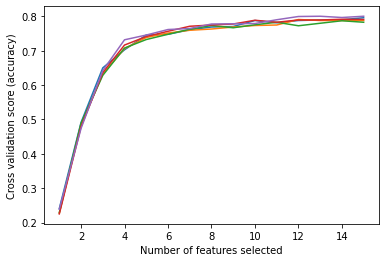

text_wend
comp_wend
tv_wend
text_week
comp_week
tv_week
fam_tv_mor
phone_14_wend


In [52]:
scaler = StandardScaler()
sett = ['talk_phon_week', 'talk_phon_wend', 'text_wend', 'comp_wend', 'talk_mob_week', 'tv_wend', 'text_week', 'talk_mob_wend', 'comp_week', 'tv_week', 'fam_tv_eve', 'fam_tv_aft', 'fam_tv_mor', 'phone_14_wend', 'phone_14_week']
print(sett)
X = knndf[sett].to_numpy()
y = knndf['secd_diag'].to_numpy()
X= scaler.fit_transform(X)
smote_strat={}
under_strat={}
for category in Counter(y).keys():
    if Counter(y)[category] > round(len(y)/(len(Counter(y))*2)):
        smote_strat[category] = Counter(y)[category]
        under_strat[category] = (round(len(y)/(len(Counter(y))*2)))-1
    else:
        smote_strat[category] = (round(len(y)/(len(Counter(y))*2)))-1
        under_strat[category] = (round(len(y)/(len(Counter(y))*2)))-1
print(Counter(y))
print(under_strat)
smote = SMOTE(sampling_strategy=smote_strat,k_neighbors = 1)
under = RandomUnderSampler(sampling_strategy=under_strat)
steps = [('o', smote), ('u', under)]
pipeline = Pipeline(steps=steps)
# fit predictor and target variable
X, y = pipeline.fit_resample(X, y)

#estimator = SVR(kernel="linear")
estimator = RandomForestClassifier()
min_features_to_select = 1  # Minimum number of features to consider
selector = RFECV(estimator, step=1, cv=5,min_features_to_select=min_features_to_select)
print(X.shape)
print(y.shape)
selector = selector.fit(X, y)
print(selector.support_)


print("Optimal number of features : %d" % selector.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(range(min_features_to_select, len(selector.grid_scores_) + min_features_to_select),selector.grid_scores_)
plt.show()
selector = RFE(estimator, n_features_to_select=8, step=1)
selector = selector.fit(X, y)
for i in range(len(selector.support_)):
    if (selector.support_[i]==True):
        print(sett[i])

['talk_phon_week', 'talk_phon_wend', 'text_wend', 'comp_wend', 'talk_mob_week', 'tv_wend', 'text_week', 'talk_mob_wend', 'comp_week', 'tv_week', 'fam_tv_eve', 'fam_tv_aft', 'fam_tv_mor', 'phone_14_wend', 'phone_14_week']
Counter({0.0: 7796, 2.0: 2497, 1.0: 1483, 3.0: 635, 4.0: 484, 5.0: 260, 11.0: 181, 10.0: 134, 6.0: 112, 12.0: 74, 7.0: 42, 8.0: 30, 9.0: 6})
{0.0: 527, 3.0: 527, 1.0: 527, 5.0: 527, 10.0: 527, 4.0: 527, 2.0: 527, 9.0: 527, 12.0: 527, 6.0: 527, 11.0: 527, 8.0: 527, 7.0: 527}
(6851, 15)
(6851,)
[False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
Optimal number of features : 14


C:\Users\oq19291\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


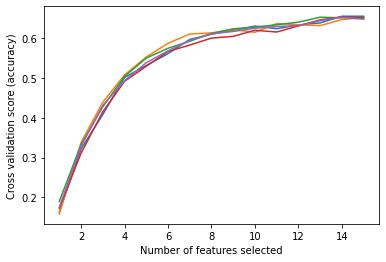

text_wend
comp_wend
tv_wend
talk_mob_wend
comp_week
tv_week
fam_tv_aft
phone_14_week


In [53]:
scaler = StandardScaler()
sett = ['talk_phon_week', 'talk_phon_wend', 'text_wend', 'comp_wend', 'talk_mob_week', 'tv_wend', 'text_week', 'talk_mob_wend', 'comp_week', 'tv_week', 'fam_tv_eve', 'fam_tv_aft', 'fam_tv_mor', 'phone_14_wend', 'phone_14_week']
print(sett)
X = knndf[sett].to_numpy()
y = knndf['prim_diag'].to_numpy()
X= scaler.fit_transform(X)
smote_strat={}
under_strat={}
for category in Counter(y).keys():
    if Counter(y)[category] > round(len(y)/(len(Counter(y))*2)):
        smote_strat[category] = Counter(y)[category]
        under_strat[category] = (round(len(y)/(len(Counter(y))*2)))-1
    else:
        smote_strat[category] = (round(len(y)/(len(Counter(y))*2)))-1
        under_strat[category] = (round(len(y)/(len(Counter(y))*2)))-1
print(Counter(y))
print(under_strat)
smote = SMOTE(sampling_strategy=smote_strat,k_neighbors = 1)
under = RandomUnderSampler(sampling_strategy=under_strat)
steps = [('o', smote), ('u', under)]
pipeline = Pipeline(steps=steps)
# fit predictor and target variable
X, y = pipeline.fit_resample(X, y)

#estimator = SVR(kernel="linear")
estimator = RandomForestClassifier()
min_features_to_select = 1  # Minimum number of features to consider
selector = RFECV(estimator, step=1, cv=5,min_features_to_select=min_features_to_select)
print(X.shape)
print(y.shape)
selector = selector.fit(X, y)
print(selector.support_)

print("Optimal number of features : %d" % selector.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(range(min_features_to_select, len(selector.grid_scores_) + min_features_to_select),selector.grid_scores_)
plt.show()
selector = RFE(estimator, n_features_to_select=8, step=1)
selector = selector.fit(X, y)
for i in range(len(selector.support_)):
    if (selector.support_[i]==True):
        print(sett[i])

['talk_phon_week', 'talk_phon_wend', 'text_wend', 'comp_wend', 'talk_mob_week', 'tv_wend', 'text_week', 'talk_mob_wend', 'comp_week', 'tv_week', 'fam_tv_eve', 'fam_tv_aft', 'fam_tv_mor', 'phone_14_wend', 'phone_14_week']
Counter({0.0: 9133, 1.0: 3871, 2.0: 467, 3.0: 163, 4.0: 100})
{0.0: 1372, 2.0: 1372, 1.0: 1372, 4.0: 1372, 3.0: 1372}
(6860, 15)
(6860,)
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
Optimal number of features : 15


C:\Users\oq19291\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


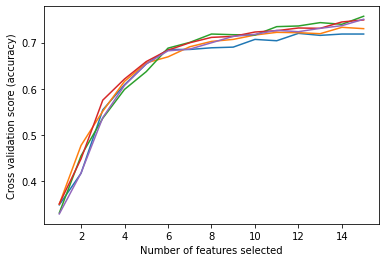

text_wend
comp_wend
tv_wend
talk_mob_wend
comp_week
tv_week
fam_tv_mor
phone_14_wend


In [54]:
scaler = StandardScaler()
sett = ['talk_phon_week', 'talk_phon_wend', 'text_wend', 'comp_wend', 'talk_mob_week', 'tv_wend', 'text_week', 'talk_mob_wend', 'comp_week', 'tv_week', 'fam_tv_eve', 'fam_tv_aft', 'fam_tv_mor', 'phone_14_wend', 'phone_14_week']
print(sett)
X = knndf[sett].to_numpy()
y = knndf['dep_score'].to_numpy()
X= scaler.fit_transform(X)
smote_strat={}
under_strat={}
for category in Counter(y).keys():
    if Counter(y)[category] > round(len(y)/(len(Counter(y))*2)):
        smote_strat[category] = Counter(y)[category]
        under_strat[category] = (round(len(y)/(len(Counter(y))*2)))-1
    else:
        smote_strat[category] = (round(len(y)/(len(Counter(y))*2)))-1
        under_strat[category] = (round(len(y)/(len(Counter(y))*2)))-1
print(Counter(y))
print(under_strat)
smote = SMOTE(sampling_strategy=smote_strat,k_neighbors = 1)
under = RandomUnderSampler(sampling_strategy=under_strat)
steps = [('o', smote), ('u', under)]
pipeline = Pipeline(steps=steps)
# fit predictor and target variable
X, y = pipeline.fit_resample(X, y)
estimator = RandomForestClassifier()
#estimator = SVR(kernel="linear")
min_features_to_select = 1  # Minimum number of features to consider
selector = RFECV(estimator, step=1, cv=5,min_features_to_select=min_features_to_select)
print(X.shape)
print(y.shape)
selector = selector.fit(X, y)
print(selector.support_)

print("Optimal number of features : %d" % selector.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()

plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(range(min_features_to_select, len(selector.grid_scores_) + min_features_to_select),selector.grid_scores_)
plt.show()
selector = RFE(estimator, n_features_to_select=8, step=1)
selector = selector.fit(X, y)
for i in range(len(selector.support_)):
    if (selector.support_[i]==True):
        print(sett[i])

In [ ]:
array = 